In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings

mag = pd.read_csv(r"C:\Users\cacam\Downloads\Mag_proper.csv", delimiter=',') #Mag-test_cpu

samples = mag['Sample']
times = mag['Time (s)']
noise = mag['Noise (V)']
k = mag['Voltage Z (V)']
j = mag['Voltage Y (V)']
i = mag['Voltage X (V)']

seis = pd.read_csv(r"C:\Users\cacam\Downloads\seismo_proper.csv", delimiter=',') #sesimo_test

sam = seis['Sample']
tim = seis['Time (s)']
noi = seis['Noise (V)']
z = seis['Channel Z (V)']
n = seis['Channel N (V)']
e = seis['Channel E (V)']

In [3]:
from ipywidgets import interact, IntSlider
from ipywidgets import FloatSlider
from ipywidgets import Layout 

Min = min(k.min(), j.min(), i.min())
Max = max(k.max(), j.max(), i.max())

def plot_with_slider(xlim):
    
    plt.figure(figsize=(19, 8))   ## dpi breaks slider
    
    plt.plot(times, i, linewidth = 1.5, label = 'X', color = 'red')
    plt.plot(times, k, linewidth = 1.5, label = 'Z', color = 'black')
    plt.plot(times, j, linewidth = 1.5, label = 'Y', color = 'blue')
    
    plt.xlim(xlim, xlim + 15)   
    plt.ylim(Min , Max + 0.25) 
    '''
    plt.legend(loc = 'upper right', fontsize = 15)
    plt.title("Electromagentic Data", fontweight = 'bold', fontsize = 25)
    plt.xlabel("Time (s)", fontweight = "bold", fontsize = 20)
    plt.ylabel("Amplitude (V)", fontweight = "bold", fontsize = 20)
    '''
    plt.grid(True)
    plt.show()


interact(plot_with_slider, xlim = FloatSlider(min = 0, max = (times[len(times)-1]), step = 3, value = 0, 
                                              layout=Layout(width='980px')))


interactive(children=(FloatSlider(value=0.0, description='xlim', layout=Layout(width='980px'), max=302.919961,…

<function __main__.plot_with_slider(xlim)>

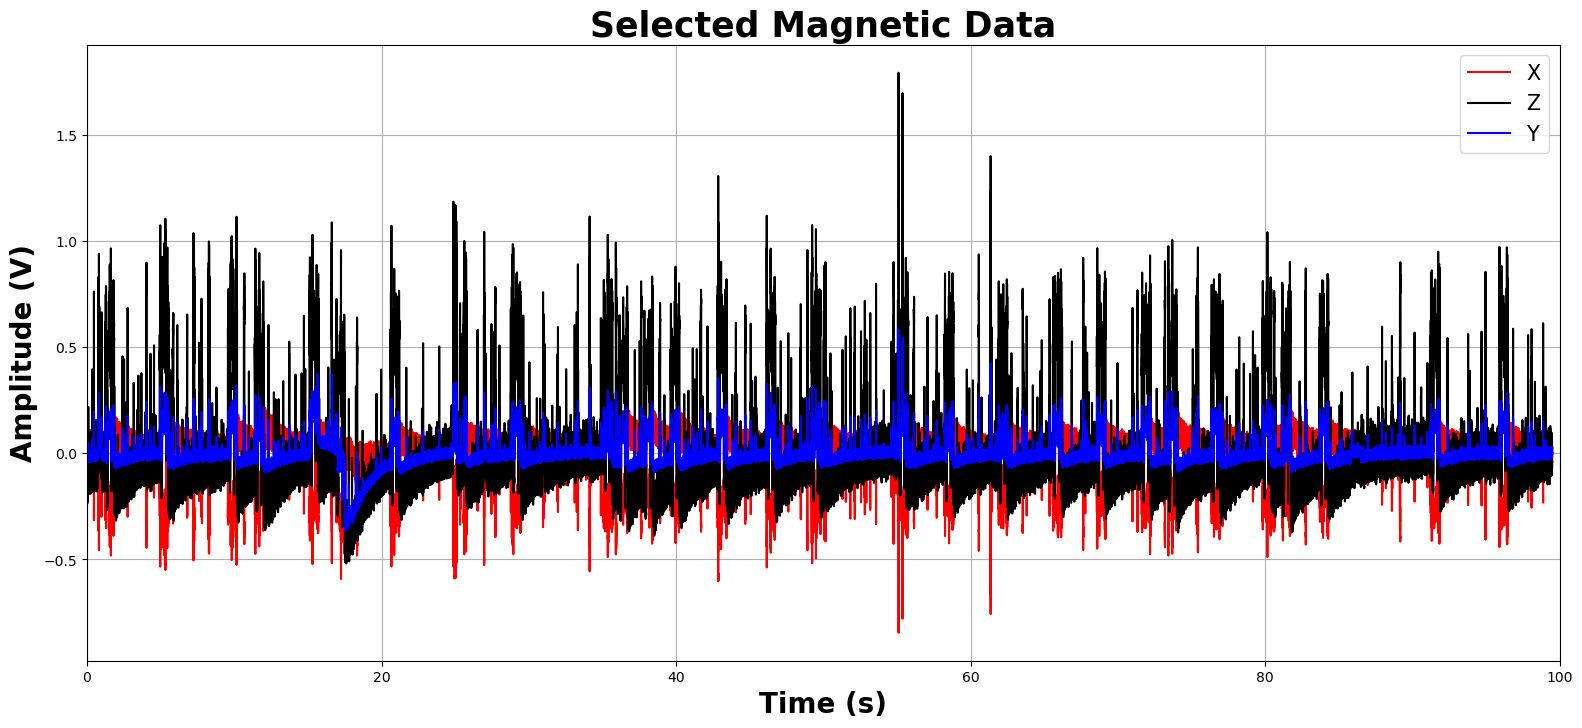

In [4]:
warnings.simplefilter('ignore')

start = 0  ##in terms of seconds 
end = 100   # times[len(times)-1]

a = 0
b = 0

for a in range(0, len(times)):
    if round(times[a]) == start:
        alpha = samples[b]
        break
        
for b in range(0, len(times)):
    if round(times[b]) == end:
        beta = samples[b]
        break


t = times[alpha:beta]
#ns = noise[alpha:beta]
k1 = k[alpha:beta]
j1 = j[alpha:beta]
i1 = i[alpha:beta]

plt.figure(figsize = (19, 8))

plt.plot(t,i1, label = 'X', color = 'red', linewidth = 1.5)
plt.plot(t,k1, label = 'Z', color = 'black', linewidth = 1.5)
plt.plot(t,j1, label = 'Y', color = 'blue', linewidth = 1.5)
#plt.plot(t,ns, label = 'Noise', color = 'yellow', linewidth = 1.5)

#'''
plt.legend(loc = 'upper right', fontsize = 15)
plt.title("Selected Magnetic Data", fontweight = 'bold', fontsize = 25)
plt.xlabel("Time (s)", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude (V)", fontweight = "bold", fontsize = 20)
#'''
plt.xlim(start,end)
plt.grid(True)
#plt.savefig("mag_selc.pdf", bbox_inches='tight')


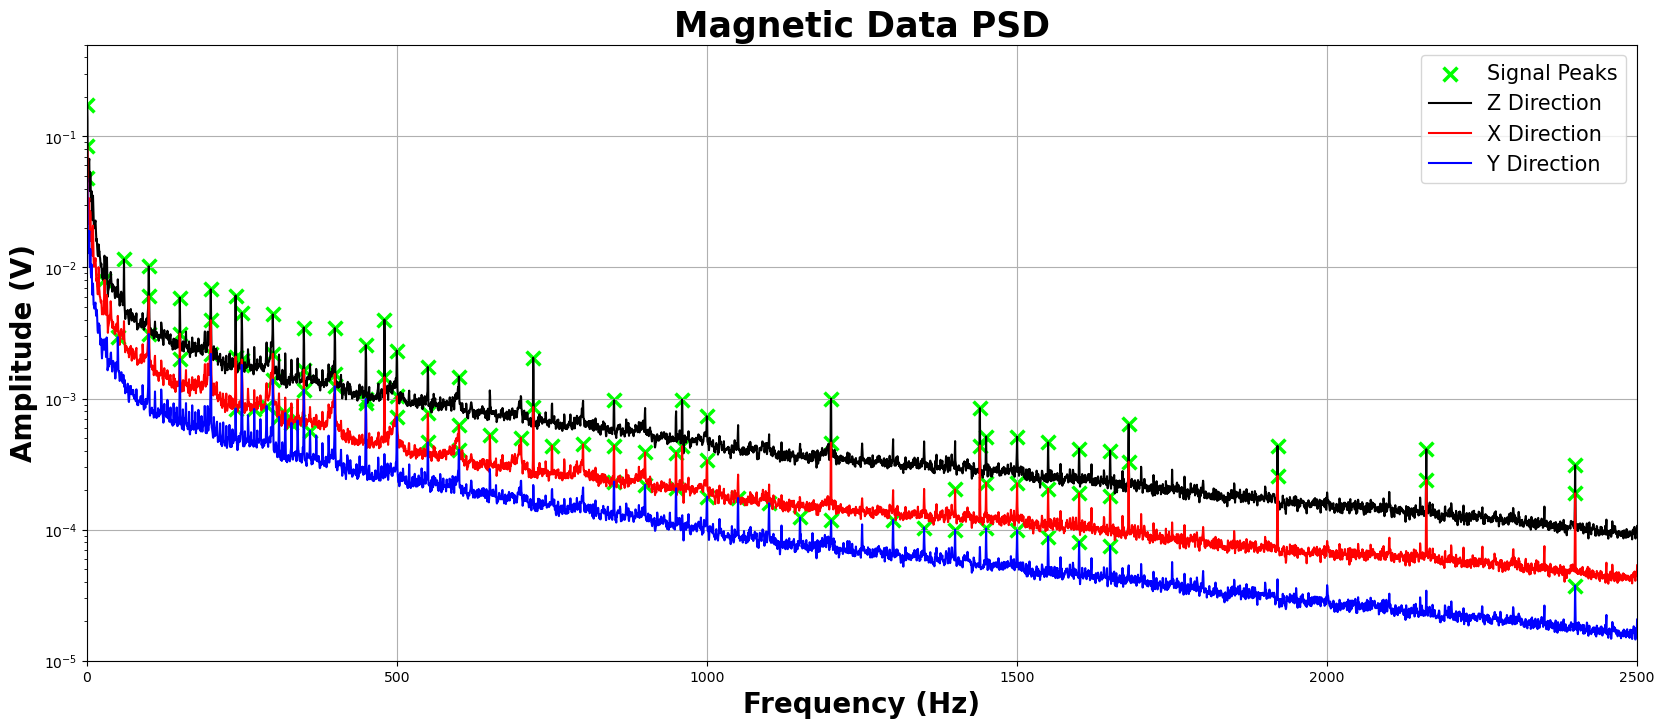

In [5]:
warnings.simplefilter('ignore')

from scipy import signal

f_k, Pxx_den_k = signal.welch(k1, 25600, window = 'hamming', nperseg = 51200) 
f_j, Pxx_den_j = signal.welch(j1, 25600, window = 'hamming', nperseg = 51200) 
f_i, Pxx_den_i = signal.welch(i1, 25600, window = 'hamming', nperseg = 51200) 

l_k = np.log(Pxx_den_k)
l_j = np.log(Pxx_den_j)
l_i = np.log(Pxx_den_i)

peaks_k, _ = signal.find_peaks(l_k, prominence = 1.2)
peaks_j, _ = signal.find_peaks(l_j, prominence = 1.2)
peaks_i, _ = signal.find_peaks(l_i, prominence = 1.2)

plt.figure(figsize = (20, 8))#, dpi = 1200)

plt.scatter(f_k[peaks_k], Pxx_den_k[peaks_k]**0.5, s = 100, color = 'lime', marker = 'x', 
            linewidths = 2.5, label = 'Signal Peaks')
plt.scatter(f_j[peaks_j], Pxx_den_j[peaks_j]**0.5, s = 100, color = 'lime', marker = 'x', 
            linewidths = 2.5)
plt.scatter(f_i[peaks_i], Pxx_den_i[peaks_i]**0.5, s = 100, color = 'lime', marker = 'x', 
            linewidths = 2.5)

plt.semilogy(f_k, Pxx_den_k ** 0.5, color = 'black', linewidth = 1.5, label = 'Z Direction')
plt.semilogy(f_i, Pxx_den_i ** 0.5, color = 'red', linewidth = 1.5, label = 'X Direction')
plt.semilogy(f_j, Pxx_den_j ** 0.5, color = 'blue', linewidth = 1.5, label = 'Y Direction')

#'''
plt.legend(loc = "upper right", fontsize = 15)
plt.title("Magnetic Data PSD", fontweight = 'bold', fontsize = 25)
plt.xlabel("Frequency (Hz)", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude (V)", fontweight = "bold", fontsize = 20)
#'''
plt.ylim(10e-6,0.5)
plt.xlim(0,2500)
plt.grid(True)
#plt.savefig("magnetic_psd.pdf", bbox_inches='tight')
           

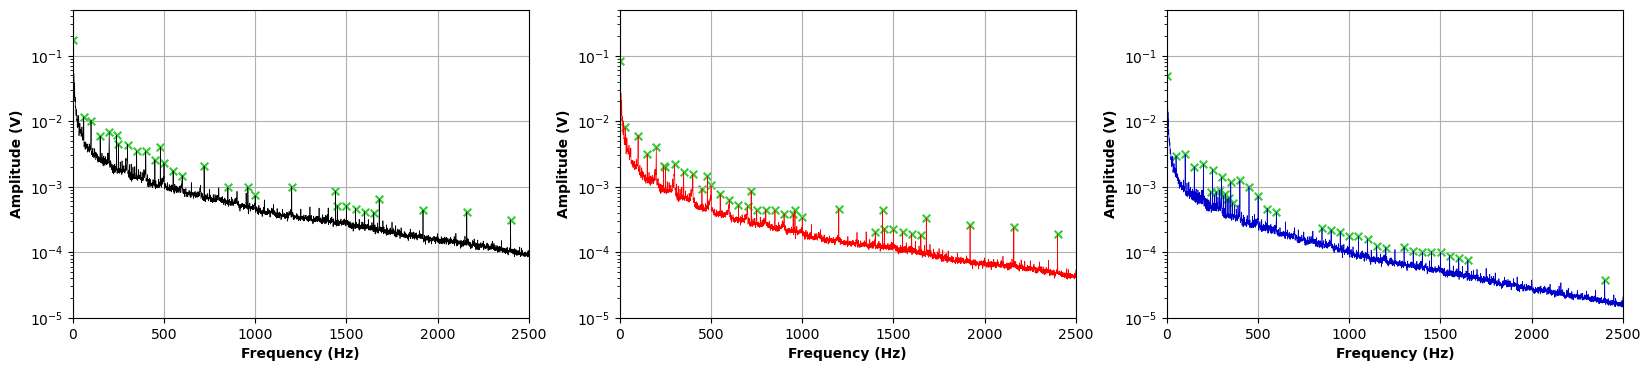

In [6]:
from matplotlib import gridspec

fig = plt.figure(figsize = (20,4))#, dpi = 1200)

gs = gridspec.GridSpec(1,3)

axis1 = fig.add_subplot(gs[0,0])

axis1.semilogy(f_k, Pxx_den_k ** 0.5, color = 'black', linewidth = 0.5, label = 'Channel Z')
axis1.scatter(f_k[peaks_k], Pxx_den_k[peaks_k]**0.5, s = 30, color = 'limegreen', marker = 'x', 
              linewidths = 1.5, label = 'Signal Peaks')

axis1.set_xlabel("Frequency (Hz)", fontweight = "bold", fontsize = 10)
axis1.set_ylabel("Amplitude (V)", fontweight = "bold", fontsize = 10)

axis1.set_ylim([10e-6, 0.5])
axis1.set_xlim(0,2500)
axis1.grid(True)

################################################################################################################################

axis2 = fig.add_subplot(gs[0,1])

axis2.semilogy(f_i, Pxx_den_i ** 0.5, color = 'red', linewidth = 0.5, label = 'Channel N')
axis2.scatter(f_i[peaks_i], Pxx_den_i[peaks_i]**0.5, s = 30, color = 'limegreen', marker = 'x', 
              linewidths = 1.5)

axis2.set_xlabel("Frequency (Hz)", fontweight = "bold", fontsize = 10)
axis2.set_ylabel("Amplitude (V)", fontweight = "bold", fontsize = 10)

axis2.set_ylim([10e-6, 0.5])
axis2.set_xlim(0,2500)
axis2.grid(True)

################################################################################################################################

axis3 = fig.add_subplot(gs[0,2])

axis3.semilogy(f_j, Pxx_den_j ** 0.5, color = 'mediumblue', linewidth = 0.5, label = 'Channel E')
axis3.scatter(f_j[peaks_j], Pxx_den_j[peaks_j]**0.5, s = 30, color = 'limegreen', marker = 'x', 
              linewidths = 1.5)

axis3.set_xlabel("Frequency (Hz)", fontweight = "bold", fontsize = 10)
axis3.set_ylabel("Amplitude (V)", fontweight = "bold", fontsize = 10)

axis3.set_ylim([10e-6, 0.5])
axis3.set_xlim(0,2500)
axis3.grid(True)

#fig.savefig("Channel_plot_2.pdf", bbox_inches='tight')

In [60]:
c = 0
g = 0
h = 0

lst = []
lt = []

badwolf = max(len(f_i[peaks_i]), len(f_j[peaks_j]), len(f_k[peaks_k]))
#print(len(f_i[peaks_i]), len(f_j[peaks_j]), len(f_k[peaks_k]))

for g in range(0, badwolf - len(f_j[peaks_j])):
    lst.append('NaN')
for h in range(0, badwolf - len(f_k[peaks_k])):
    lt.append('NaN')

with open (r"C:\Users\cacam\Documents\Mag_frequencies.csv",'w') as f:
        f.write('Frequency (X), Amplitude (X), Frequency (Y), Amplitude (Y), Frequency (Z), Amplitude (Z) \n')
        for c in range(0, badwolf):
            if (len(f_i[peaks_i]) != len(f_j[peaks_j]) != len(f_k[peaks_k])):
                if len(f_i[peaks_i]) == badwolf:
                        
                    dir1 = np.append(f_j[peaks_j], lst)
                    dir_1 = np.append(Pxx_den_j[peaks_j], lst)
                    dir2 = np.append(f_k[peaks_k], lt)
                    dir_2 = np.append(Pxx_den_k[peaks_k], lt)
                    
                    f.write(str(f_i[peaks_i][c]) + ',' + str(Pxx_den_i[peaks_i][c]) + ',' +    
                            str(dir1[c]) + ',' + str(dir_1[c]) + ',' +
                            str(dir2[c]) + ',' + str(dir_2[c]) + '\n')
                    
                elif len(f_j[peaks_j]) == badwolf:
                    
                    dir1 = np.append(f_i[peaks_i], lst)
                    dir_1 = np.append(Pxx_den_i[peaks_i], lst)
                    dir2 = np.append(f_k[peaks_k], lt)
                    dir_2 = np.append(Pxx_den_k[peaks_k], lt)
                    
                    f.write(str(dir1[c]) + ',' + str(dir_1) + ',' +    
                            str(f_j[peaks_j][c]) + ',' + str(Pxx_den_j[peaks_j][c]) + ',' +
                            str(dir2[c]) + ',' + str(dir_2[c]) + '\n')

                elif len(f_k[peaks_k]) == badwolf:
                    
                    dir1 = np.append(f_i[peaks_i], lst)
                    dir_1 = np.append(Pxx_den_i[peaks_i], lst)
                    dir2 = np.append(f_j[peaks_j], lt)
                    dir_2 = np.append(Pxx_den_j[peaks_j], lt)
                    
                    
                    f.write(str(dir1[c]) + ',' + str(dir_1) + ',' +    
                            str(dir2[c]) + ',' + str(dir_2[c]) + ',' +
                            str(f_k[peaks_k][c]) + ',' + str(f_k[peaks_k][c]) + '\n')
                   
            else:
                f.write(str(f_i[peaks_i][c]) + ',' + str(Pxx_den_i[peaks_i][c]) + ',' +    
                        str(f_j[peaks_j][c]) + ',' + str(Pxx_den_j[peaks_j][c]) + ',' +
                        str(f_k[peaks_k][c]) + ',' + str(Pxx_den_k[peaks_k][c]) + '\n')
print("It ran")

It ran


In [8]:
from ipywidgets import interact, IntSlider
from ipywidgets import FloatSlider
from ipywidgets import Layout

Min = min(z.min(), n.min(), e.min())
Max = max(z.max(), n.max(), e.max())


def plot_with_slider(xlim):

    plt.figure(figsize=(19, 8))   ## dpi breaks slider
    
    plt.plot(tim, z, linewidth = 1.75, color = 'black', label = 'Z')
    plt.plot(tim, n, linewidth = 1.75, color = 'red', label = 'N')
    plt.plot(tim, e, linewidth = 1.75, color = 'mediumblue', label = 'E')
    '''
    plt.legend(loc = "upper right", fontsize = 15)
    plt.title("Seismic Data", fontweight = 'bold', fontsize = 25)
    plt.xlabel("Time (s)", fontweight = "bold", fontsize = 20)
    plt.ylabel("Amplitude (V)", fontweight = "bold", fontsize = 20)
    '''
    plt.xlim(xlim, xlim + 10)   
    plt.ylim(Min - 2, Max + 1) 
    #plt.axhline()
    plt.grid(True)
    plt.show()


interact(plot_with_slider, xlim = FloatSlider(min = 0, max = (tim[len(tim)-1]), step = 3, value = 0, 
                                              layout=Layout(width='980px')))


interactive(children=(FloatSlider(value=0.0, description='xlim', layout=Layout(width='980px'), max=312.440645,…

<function __main__.plot_with_slider(xlim)>

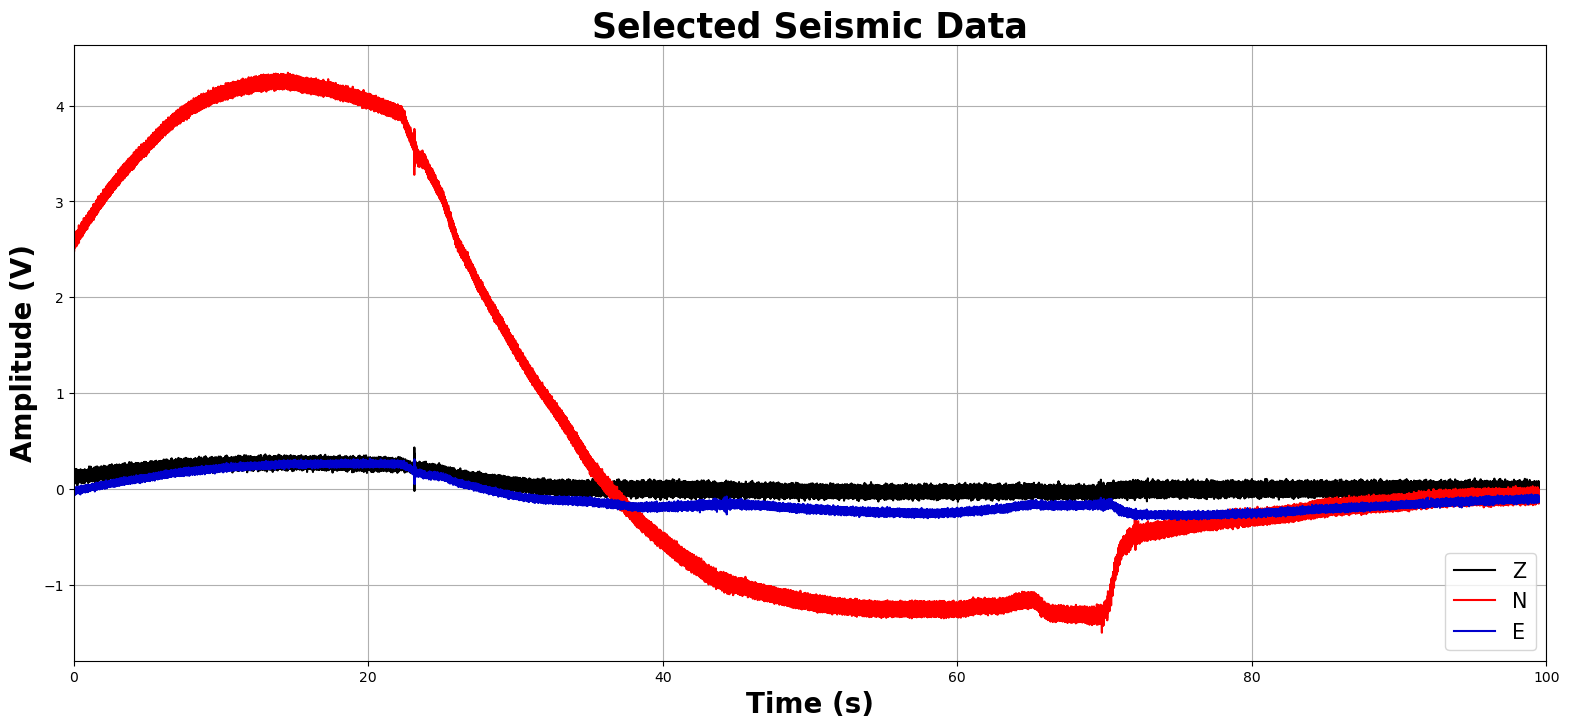

In [9]:
start = 0  ##in terms of seconds 
end = 100   # times[len(times)-1]

d = 0
f = 0

for d in range(0, len(tim)):
    if round(tim[d]) == start:
        gamma = sam[d]
        break
        
for f in range(0, len(tim)):
    if round(tim[f]) == end:
        delta = sam[f]
        break

t1 = tim[gamma:delta]
#no = noi[gamma:delta]
z1 = z[gamma:delta]
n1 = n[gamma:delta]
e1 = e[gamma:delta]


plt.figure(figsize = (19, 8))
    
plt.plot(t1,z1, linewidth = 1.5, color = 'black', label = 'Z')
plt.plot(t1,n1, linewidth = 1.5, color = 'red', label = 'N')
plt.plot(t1,e1, linewidth = 1.5, color = 'mediumblue', label = 'E')
#plt.plot(t1,no, linewidth = 1.5, color = 'yellow', label = 'Noise')

#'''
plt.legend(loc = "lower right", fontsize = 15)
plt.title("Selected Seismic Data", fontweight = 'bold', fontsize = 25)
plt.xlabel("Time (s)", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude (V)", fontweight = "bold", fontsize = 20)
#'''
plt.xlim(start,end)
plt.grid(True)
#plt.savefig("seismo_selc.pdf", bbox_inches='tight')

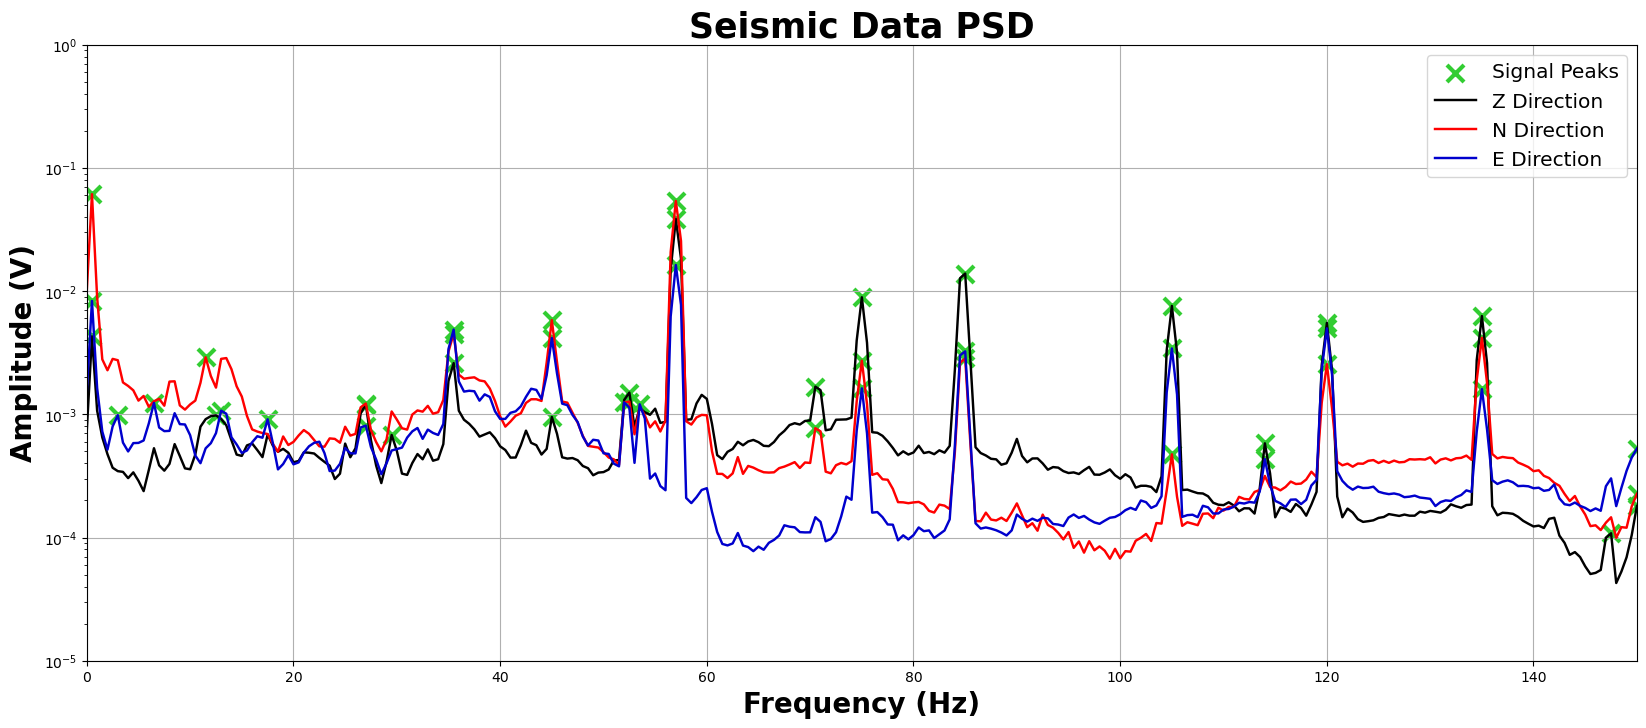

In [81]:
from scipy import signal

f_z, Pxx_den_z = signal.welch(z1, 1651.612903, window = 'hamming', nperseg = 3303.225806) #1651.612903
f_n, Pxx_den_n = signal.welch(n1, 1651.612903, window = 'hamming', nperseg = 3303.225806)
f_e, Pxx_den_e = signal.welch(e1, 1651.612903, window = 'hamming', nperseg = 3303.225806)

log_z = np.log(Pxx_den_z)
log_n = np.log(Pxx_den_n)
log_e = np.log(Pxx_den_e)

peak_z, _ = signal.find_peaks(log_z, prominence = 1.2)
peak_n, _ = signal.find_peaks(log_n, prominence = 1.2)
peak_e, _ = signal.find_peaks(log_e, prominence = 1.2)

#print(f_z[peak_z])

plt.figure(figsize = (20, 8))#, dpi = 2500)

plt.scatter(f_z[peak_z], Pxx_den_z[peak_z] ** 0.5, s = 150, color = 'limegreen', marker = 'x', 
            linewidths = 3, label = 'Signal Peaks')
plt.scatter(f_n[peak_n], Pxx_den_n[peak_n] ** 0.5, s = 150, color = 'limegreen', marker = 'x', 
            linewidths = 3)
plt.scatter(f_e[peak_e], Pxx_den_e[peak_e] ** 0.5, s = 150, color = 'limegreen', marker = 'x', 
            linewidths = 3)

plt.semilogy(f_z, Pxx_den_z ** 0.5, color = 'black', linewidth = 1.75, label = 'Z Direction')
plt.semilogy(f_n, Pxx_den_n ** 0.5, color = 'red', linewidth = 1.75, label = 'N Direction')
plt.semilogy(f_e, Pxx_den_e ** 0.5, color = 'mediumblue', linewidth = 1.75, label = 'E Direction')


#'''
plt.legend(loc = "upper right", fontsize = 14.5)
plt.title("Seismic Data PSD", fontweight = 'bold', fontsize = 25)
plt.xlabel("Frequency (Hz)", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude (V)", fontweight = "bold", fontsize = 20)
#'''
plt.ylim([10e-6, 1])
plt.xlim(0,150)
plt.grid(True)
#plt.savefig("seismo_psd.pdf", bbox_inches='tight')

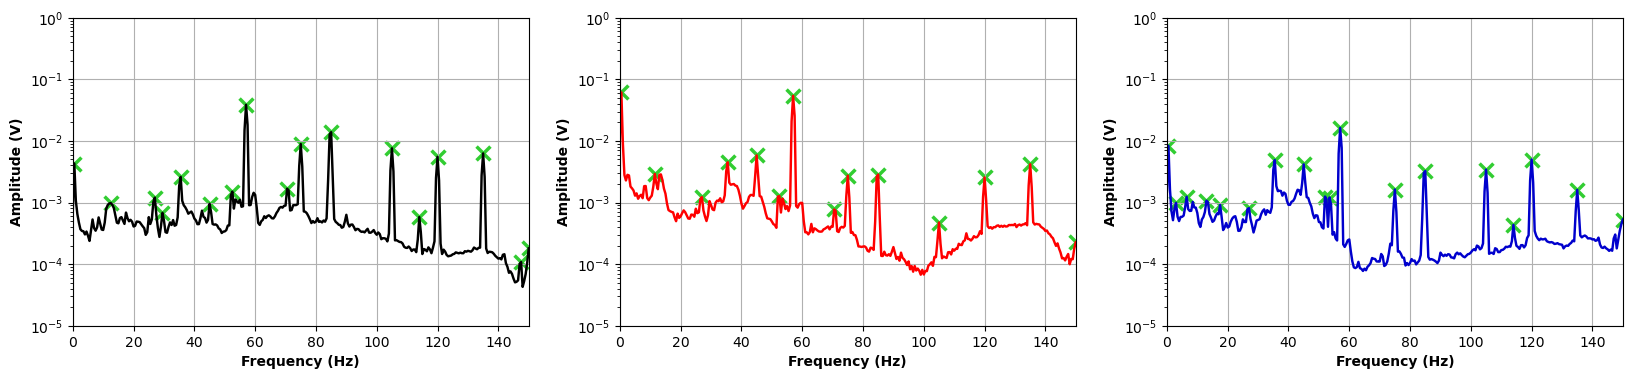

In [82]:
from matplotlib import gridspec

fig = plt.figure(figsize = (20,4)) #, dpi = 2500)

gs = gridspec.GridSpec(1,3)

axis1 = fig.add_subplot(gs[0,0])

axis1.scatter(f_z[peak_z], Pxx_den_z[peak_z] ** 0.5, s = 100, color = 'limegreen', marker = 'x', 
              linewidths = 2.5, label = 'Signal Peaks')
axis1.semilogy(f_z, Pxx_den_z ** 0.5, color = 'black', linewidth = 1.75, label = 'Channel Z')

axis1.set_xlabel("Frequency (Hz)", fontweight = "bold", fontsize = 10)
axis1.set_ylabel("Amplitude (V)", fontweight = "bold", fontsize = 10)

axis1.set_ylim([10e-6, 1])
axis1.set_xlim(0,150)
axis1.grid(True)

################################################################################################################################

axis2 = fig.add_subplot(gs[0,1])

axis2.scatter(f_n[peak_n], Pxx_den_n[peak_n] ** 0.5, s = 100, color = 'limegreen', marker = 'x', 
              linewidths = 2.5)
axis2.semilogy(f_n, Pxx_den_n ** 0.5, color = 'red', linewidth = 1.75, label = 'Channel N')

axis2.set_xlabel("Frequency (Hz)", fontweight = "bold", fontsize = 10)
axis2.set_ylabel("Amplitude (V)", fontweight = "bold", fontsize = 10)

axis2.set_ylim([10e-6, 1])
axis2.set_xlim(0,150)
axis2.grid(True)

################################################################################################################################

axis3 = fig.add_subplot(gs[0,2])

axis3.scatter(f_e[peak_e], Pxx_den_e[peak_e] ** 0.5, s = 100, color = 'limegreen', marker = 'x', 
              linewidths = 2.5)
axis3.semilogy(f_e, Pxx_den_e ** 0.5, color = 'mediumblue', linewidth = 1.75, label = 'Channel E')

axis3.set_xlabel("Frequency (Hz)", fontweight = "bold", fontsize = 10)
axis3.set_ylabel("Amplitude (V)", fontweight = "bold", fontsize = 10)

axis3.set_ylim([10e-6, 1])
axis3.set_xlim(0,150)
axis3.grid(True)

#fig.savefig("Channel_plot.pdf", bbox_inches='tight')

In [63]:
l = 0
m = 0
o = 0
index = []
roll = []

tsukishima = max(len(f_e[peak_e]), len(f_n[peak_n]), len(f_z[peak_z]))
#print(len(f_e[peak_e]), len(f_n[peak_n]), len(f_z[peak_z]))

for m in range(0, tsukishima - len(f_n[peak_n])):
    index.append('NaN')
for o in range(0, tsukishima - len(f_z[peak_z])):
    roll.append('NaN')

    
with open (r"C:\Users\cacam\Documents\Seis_frequencies.csv",'w') as f:
        f.write('Frequency_E (HZ), Amplitude_E (V), Frequency_N (Hz), Amplitude_N (V), Frequency_Z (Hz), Amplitude_Z (V)\n')
        for l in range(0, tsukishima):
            if (len(f_e[peak_e]) != len(f_n[peak_n]) != len(f_z[peak_z])):                
                if len(f_e[peak_e]) == tsukishima:      
                    
                    dir3 = np.append(f_n[peak_n], index)
                    dir_3 = np.append(Pxx_den_n[peak_n], index)
                    dir4 = np.append(f_z[peak_z], roll)
                    dir_4 = np.append(Pxx_den_z[peak_z], roll)
                    
                    f.write(str(f_e[peak_e][l]) + ',' + str(Pxx_den_e[peak_e][l]) + ',' +    
                            str(dir3[l]) + ',' + str(dir_3[l]) + ',' +
                            str(dir4[l]) + ',' + str(dir_4[l]) + '\n')
                    
                    
                elif len(f_n[peak_n]) == tsukishima:
                    
                    dir3 = np.append(f_e[peak_e], index)
                    dir_3 = np.append(Pxx_den_e[peak_e], index)
                    dir4 = np.append(f_z[peak_z], roll)
                    dir_4 = np.append(Pxx_den_z[peak_z], roll)
                    
                    f.write(str(dir3[l]) + ',' + str(dir_3[l]) + ',' +    
                            str(f_n[peak_n][l]) + ',' + str(Pxx_den_n[peak_n][l]) + ',' +
                            str(dir4[l]) + ',' + str(dir_4[l]) + '\n')

                    
                elif len(f_z[peak_z]) == tsukishima:
                    
                    dir3 = np.append(f_e[peak_e], index)
                    dir_3 = np.append(Pxx_den_e[peak_e], index)
                    dir4 = np.append(f_n[peak_n], roll)
                    dir_4 = np.append(Pxx_den_n[peak_n], roll)
                    
                    f.write(str(dir3[l]) + ',' + str(dir_3[l]) + ',' +    
                            str(dir4[l]) + ',' + str(dir_4[l]) + ',' +
                            str(f_z[peak_z][l]) + ',' + str(f_z[peak_z][l]) + '\n')
                     
            else:
                f.write(str(f_e[peak_e][l]) + ',' + str(Pxx_den_e[peak_e][l]) + ',' +    
                        str(f_n[peak_n][l]) + ',' + str(Pxx_den_n[peak_n][l]) + ',' +
                        str(f_z[peak_z][l]) + ',' + str(Pxx_den_z[peak_z][l]) + '\n')

print("It ran")

It ran
